In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from nn_utils import *

In [0]:
infile = open('all_jets_train_4D_100_percent.pkl', 'rb')
traindata = pickle.load(infile)
infile.close()

In [0]:
infile = open('all_jets_test_4D_100_percent.pkl', 'rb')
testdata = pickle.load(infile)
infile.close()

In [0]:
# Normalize
train_mean = traindata.mean()
train_std = traindata.std()

traindata = (traindata - train_mean) / train_std
testdata = (testdata - train_mean) / train_std

In [0]:
train_x = traindata
test_x = testdata
train_y = train_x
test_y = test_x

trainset = TensorDataset(torch.tensor(train_x.values, dtype=torch.float), torch.tensor(train_y.values, dtype=torch.float))
validset = TensorDataset(torch.tensor(test_x.values, dtype=torch.float), torch.tensor(test_y.values, dtype=torch.float))

In [0]:
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
validloader = DataLoader(validset, batch_size=32, shuffle=False)

In [0]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print("Using: ", device)

Using:  cuda


In [0]:
#Let's experiment with different Activation functions

In [0]:
n_epochs = 40
model_lr = AE_3d_LeakyReLU().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_lr.parameters(), lr=1e-4)

In [0]:
model_lr, train_losses, valid_losses = fit(n_epochs, criterion, optimizer, model_lr, trainloader, validloader, device)

Epoch: 1, Training loss: 0.04737720942419528, Validation loss: 0.03385604480526557
Validation loss decreased (inf --> 0.03385604480526557).  Saving model ...
Epoch: 2, Training loss: 0.032145200373069664, Validation loss: 0.03395677939509159
Epoch: 3, Training loss: 0.032004250765460394, Validation loss: 0.03419821865609431
Epoch: 4, Training loss: 0.032008536450397466, Validation loss: 0.033251363955101414
Validation loss decreased (0.03385604480526557 --> 0.033251363955101414).  Saving model ...
Epoch: 5, Training loss: 0.03195710942715846, Validation loss: 0.03373888754062099
Epoch: 6, Training loss: 0.03188963315302253, Validation loss: 0.03348783044212709
Epoch: 7, Training loss: 0.0319440913886156, Validation loss: 0.03344541272250786
Epoch: 8, Training loss: 0.03184315889004115, Validation loss: 0.033346569161857874
Epoch: 9, Training loss: 0.0318607146994722, Validation loss: 0.03331899858645677
Epoch: 10, Training loss: 0.03185375364647804, Validation loss: 0.03339114297621988

KeyboardInterrupt: ignored

In [0]:
#We see that Leaky ReLU does not improve performance

In [0]:
torch.save(model_lr.state_dict(), 'model_lr.pt')

In [0]:
model_th = AE_3d_tanh().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_th.parameters(), lr=1e-4)

In [0]:
model_th, train_losses, valid_losses = fit(n_epochs, criterion, optimizer, model_th, trainloader, validloader, device)

Epoch: 1, Training loss: 0.05849870507425187, Validation loss: 0.03541364198421646
Validation loss decreased (inf --> 0.03541364198421646).  Saving model ...
Epoch: 2, Training loss: 0.03124683652331431, Validation loss: 0.03298726030790569
Validation loss decreased (0.03541364198421646 --> 0.03298726030790569).  Saving model ...
Epoch: 3, Training loss: 0.029929853972241082, Validation loss: 0.03166826735506392
Validation loss decreased (0.03298726030790569 --> 0.03166826735506392).  Saving model ...
Epoch: 4, Training loss: 0.029328589698203275, Validation loss: 0.031121559729863562
Validation loss decreased (0.03166826735506392 --> 0.031121559729863562).  Saving model ...
Epoch: 5, Training loss: 0.02860502177857675, Validation loss: 0.030253067324007274
Validation loss decreased (0.031121559729863562 --> 0.030253067324007274).  Saving model ...
Epoch: 6, Training loss: 0.026796107215401155, Validation loss: 0.02629162068505403
Validation loss decreased (0.030253067324007274 --> 0.0

In [0]:
#Tanh activation function also performed really well

In [0]:
torch.save(model_th.state_dict(), 'model_th.pt')

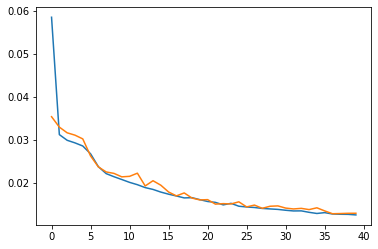

In [0]:
plt.plot(train_losses)
plt.plot(valid_losses)
plt.show()

In [0]:
#Now lets try different architectures

In [0]:
model_small = AE_3d_small().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_small.parameters(), lr=1e-4)

In [0]:
model_small, train_losses, valid_losses = fit(n_epochs, criterion, optimizer, model_small, trainloader, validloader, device)

Epoch: 1, Training loss: 0.17710668407963656, Validation loss: 0.030805615813991383
Validation loss decreased (inf --> 0.030805615813991383).  Saving model ...
Epoch: 2, Training loss: 0.027755664099307978, Validation loss: 0.02840226312254255
Validation loss decreased (0.030805615813991383 --> 0.02840226312254255).  Saving model ...
Epoch: 3, Training loss: 0.026086107265687577, Validation loss: 0.027074122823134397
Validation loss decreased (0.02840226312254255 --> 0.027074122823134397).  Saving model ...
Epoch: 4, Training loss: 0.025074016619550995, Validation loss: 0.02635261500430095
Validation loss decreased (0.027074122823134397 --> 0.02635261500430095).  Saving model ...
Epoch: 5, Training loss: 0.024134598104290545, Validation loss: 0.024824739062734528
Validation loss decreased (0.02635261500430095 --> 0.024824739062734528).  Saving model ...
Epoch: 6, Training loss: 0.023247901240508188, Validation loss: 0.023684522139576628
Validation loss decreased (0.024824739062734528 -

In [0]:
#This smalled model also achieved pretty good results but worse than the baseline model, so maybe a model of greater complexity would perform better? 

In [0]:
torch.save(model_small.state_dict(), 'model_small.pt')

In [0]:
model_big = AE_3d_big().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_big.parameters(), lr=1e-4)

In [0]:
model_big, train_losses, valid_losses = fit(n_epochs, criterion, optimizer, model_big, trainloader, validloader, device)

Epoch: 1, Training loss: 0.06686789453455845, Validation loss: 0.03182895383232825
Validation loss decreased (inf --> 0.03182895383232825).  Saving model ...
Epoch: 2, Training loss: 0.026116360132179998, Validation loss: 0.023640787257179958
Validation loss decreased (0.03182895383232825 --> 0.023640787257179958).  Saving model ...
Epoch: 3, Training loss: 0.022103866256915277, Validation loss: 0.024467275853565035
Epoch: 4, Training loss: 0.01905563269704783, Validation loss: 0.01674901589312222
Validation loss decreased (0.023640787257179958 --> 0.01674901589312222).  Saving model ...
Epoch: 5, Training loss: 0.016778915509598626, Validation loss: 0.016857386842951842
Epoch: 6, Training loss: 0.015516083798461616, Validation loss: 0.017356750740215726
Epoch: 7, Training loss: 0.01433839823358437, Validation loss: 0.014413835553801884
Validation loss decreased (0.01674901589312222 --> 0.014413835553801884).  Saving model ...
Epoch: 8, Training loss: 0.01425435375523528, Validation lo

In [0]:
#Lets add some regularization techniques

In [0]:
model_drop = AE_3d_dropout().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_drop.parameters(), lr=1e-3)

In [34]:
model_drop, train_losses, valid_losses = fit(n_epochs, criterion, optimizer, model_drop, trainloader, validloader, device)

Epoch: 1, Training loss: 0.06082287816193251, Validation loss: 0.06159507606425738
Validation loss decreased (inf --> 0.06159507606425738).  Saving model ...
Epoch: 2, Training loss: 0.059425745752192796, Validation loss: 0.05868726400594553
Validation loss decreased (0.06159507606425738 --> 0.05868726400594553).  Saving model ...
Epoch: 3, Training loss: 0.05927781391735325, Validation loss: 0.058136902046251354
Validation loss decreased (0.05868726400594553 --> 0.058136902046251354).  Saving model ...
Epoch: 4, Training loss: 0.05823421736984046, Validation loss: 0.06268306017706268
Epoch: 5, Training loss: 0.058485257863128394, Validation loss: 0.058547373481725666
Epoch: 6, Training loss: 0.05761674193225046, Validation loss: 0.06354420577352803
Epoch: 7, Training loss: 0.0578907986379985, Validation loss: 0.05712435303098209
Validation loss decreased (0.058136902046251354 --> 0.05712435303098209).  Saving model ...
Epoch: 8, Training loss: 0.05738225295067124, Validation loss: 0.0

KeyboardInterrupt: ignored

In [0]:
torch.save(model_drop.state_dict(), 'model_drop.pt')

In [0]:
#model_bn_dropout = AE_3d_bn_dropout().to(device)
#criterion = nn.MSELoss()
optimizer = optim.Adam(model_bn_dropout.parameters(), lr=1e-4, weight_decay=0.0001)

In [51]:
model_bn_dropout, train_losses, valid_losses = fit(5, criterion, optimizer, model_bn_dropout, trainloader, validloader, device)

Epoch: 1, Training loss: 0.1095821287293194, Validation loss: 0.11421487774930093
Validation loss decreased (inf --> 0.11421487774930093).  Saving model ...
Epoch: 2, Training loss: 0.10913719898318999, Validation loss: 0.11400134608285924
Validation loss decreased (0.11421487774930093 --> 0.11400134608285924).  Saving model ...
Epoch: 3, Training loss: 0.1078958154651195, Validation loss: 0.11416777284513281
Epoch: 4, Training loss: 0.10929384766094297, Validation loss: 0.1145859849159723
Epoch: 5, Training loss: 0.10886714970836929, Validation loss: 0.11493220241224603


In [0]:
#The model was trained for 40 epochs total

In [0]:
torch.save(model_bn_dropout.state_dict(), 'model_bn_dropout.pt')